In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

In [2]:
sensitivity_output = MultiParamOutputLoader("/nfs01/covid_sims//1592693057-multiparam")

In [3]:
sensitivity_output.sim_results['Nominal Student Parameters'].keys()

dict_keys([(4500.0, 0.0), (4500.0, 0.02), (4500.0, 0.04), (4500.0, 0.06), (4500.0, 0.08), (4500.0, 0.1), (4500.0, 0.125), (4500.0, 0.15), (4500.0, 0.175), (4500.0, 0.2), (5000.0, 0.0), (5000.0, 0.02), (5000.0, 0.04), (5000.0, 0.06), (5000.0, 0.08), (5000.0, 0.1), (5000.0, 0.125), (5000.0, 0.15), (5000.0, 0.175), (5000.0, 0.2), (5500.0, 0.0), (5500.0, 0.02), (5500.0, 0.04), (5500.0, 0.06), (5500.0, 0.08), (5500.0, 0.1), (5500.0, 0.125), (5500.0, 0.15), (5500.0, 0.175), (5500.0, 0.2), (6000.0, 0.0), (6000.0, 0.02), (6000.0, 0.04), (6000.0, 0.06), (6000.0, 0.08), (6000.0, 0.1), (6000.0, 0.125), (6000.0, 0.15), (6000.0, 0.175), (6000.0, 0.2), (6500.0, 0.0), (6500.0, 0.02), (6500.0, 0.04), (6500.0, 0.06), (6500.0, 0.08), (6500.0, 0.1), (6500.0, 0.125), (6500.0, 0.15), (6500.0, 0.175), (6500.0, 0.2), (7000.0, 0.0), (7000.0, 0.02), (7000.0, 0.04), (7000.0, 0.06), (7000.0, 0.08), (7000.0, 0.1), (7000.0, 0.125), (7000.0, 0.15), (7000.0, 0.175), (7000.0, 0.2), (7500.0, 0.0), (7500.0, 0.02), (750

In [4]:
keys = sensitivity_output.sim_results['Nominal Student Parameters'].keys()
X_popsize = sorted(list(set([x[0] for x in keys])))
Y_testfrac = sorted(list(set([x[1] for x in keys])))

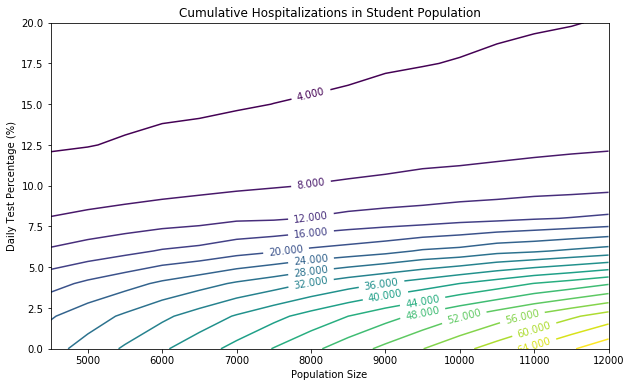

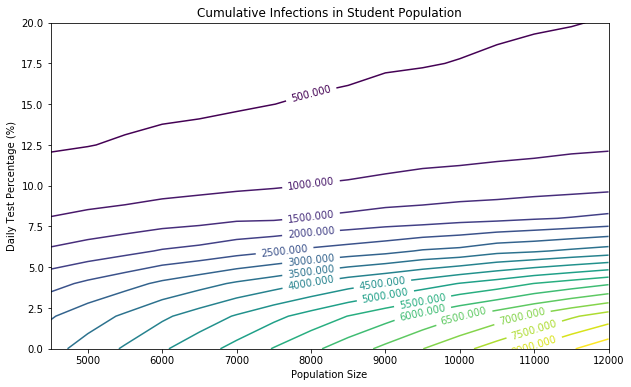

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_median_data(dfs):
    hosps = np.quantile([get_cum_hosp(df) for df in dfs], 0.5)
    outside_infs = np.quantile([get_cum_outside_infections(df) for df in dfs], 0.5)
    infs = np.quantile([get_cum_infections(df) for df in dfs], 0.5)
    return hosps, outside_infs, infs



Zs_hosp = []
Zs_outside_inf = []
Zs_inf = []
for popsize in X_popsize:
    
    Z_hosp = []
    Z_outside_inf = []
    Z_inf = []
    for testfrac in Y_testfrac:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        dfs = sensitivity_output.sim_results['Nominal Student Parameters'][(popsize, testfrac)]
        hosps, outside_infs, infs = get_median_data(dfs)
        Z_hosp.append(hosps)
        Z_outside_inf.append(outside_infs)
        Z_inf.append(infs)
    Zs_hosp.append(Z_hosp)
    Zs_outside_inf.append(Z_outside_inf)
    Zs_inf.append(Z_inf)

plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations in Student Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Population Size")
CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T, 20)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

plt.figure(figsize=(10,6))
plt.title("Cumulative Infections in Student Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Population Size")
CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_inf).T, 20)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

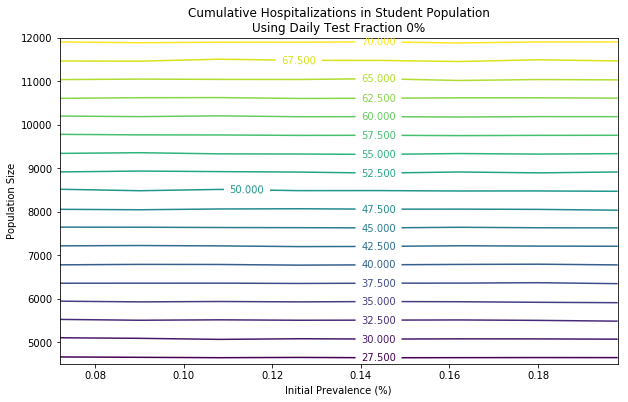

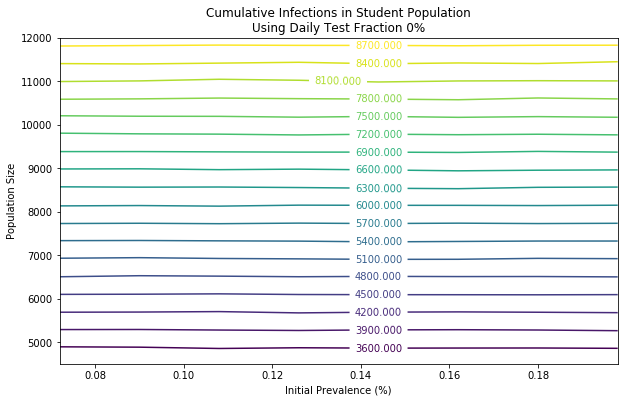

In [28]:
make_plots(0.0)

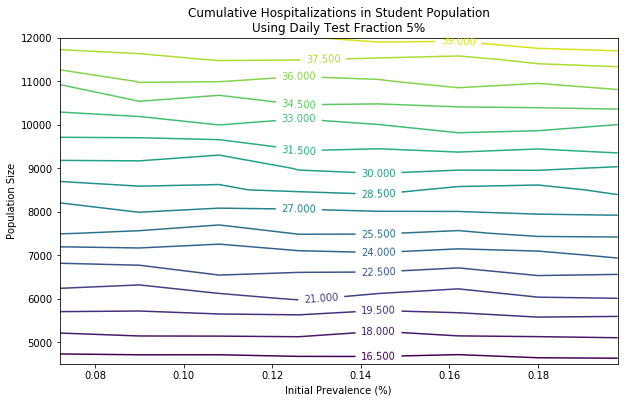

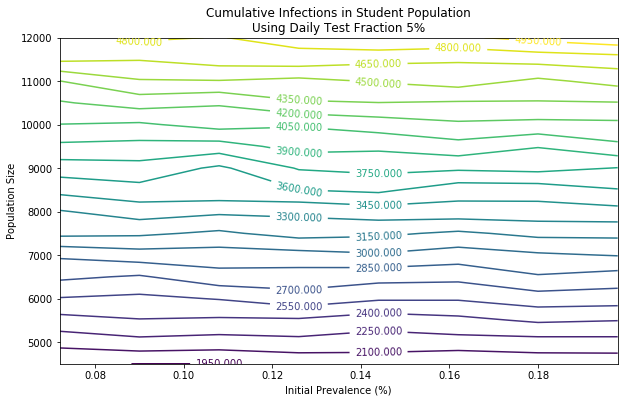

In [29]:
make_plots(0.05)

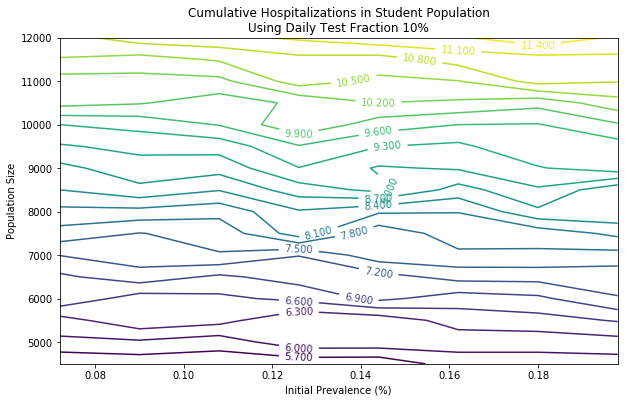

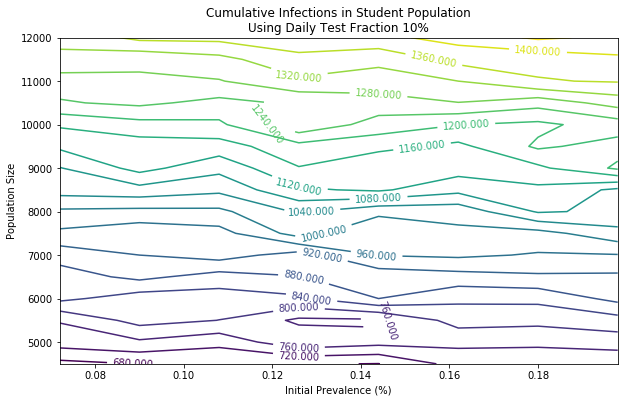

In [30]:
make_plots(0.1)

<a list of 15 text.Text objects>

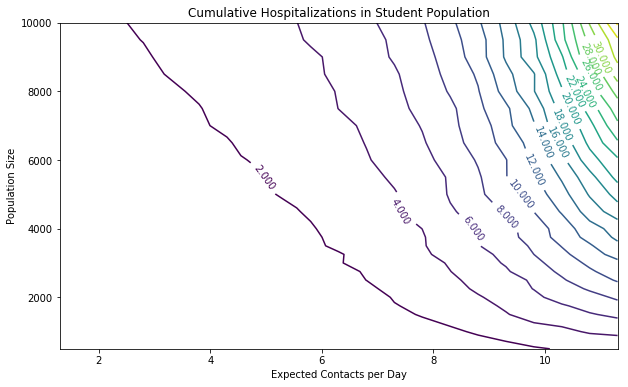

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations in Student Population")
plt.ylabel("Population Size")
plt.xlabel("Expected Contacts per Day")
CS = plt.contour(np.array(X_contacts),np.array(Y_popsize), np.array(Zs_hosp).T, 20)
plt.clabel(CS, inline=1, fontsize=10)

<a list of 15 text.Text objects>

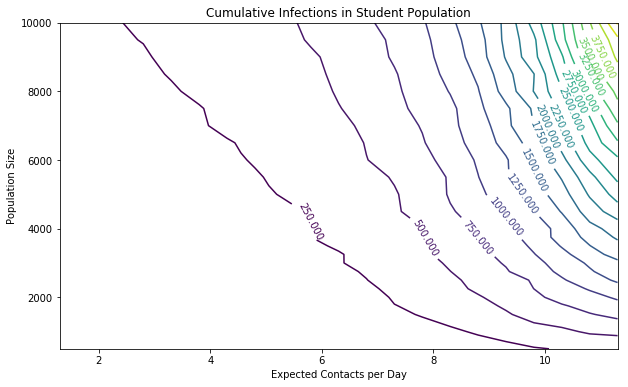

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Cumulative Infections in Student Population")
plt.ylabel("Population Size")
plt.xlabel("Expected Contacts per Day")
CS = plt.contour(np.array(X_contacts),np.array(Y_popsize), np.array(Zs_inf).T, 20)
plt.clabel(CS, inline=1, fontsize=10)

In [45]:
sensitivity_output2 = MultiParamOutputLoader("/nfs01/covid_sims//1592159950-multiparam")

In [74]:
keys = sensitivity_output2.sim_results['Nominal Student Parameters'].keys()
X_contacts = sorted(list(set([x[0] for x in keys])))
Y_popsize = [0] + sorted(list(set([x[1] for x in keys])))
#Y_popsize = sorted(list(set([x[1] for x in keys])))
import numpy as np

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum() + 12.6

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum() + 594.5

def get_cum_infections(df):
    
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum() + 594.5

def get_median_data(dfs):
    hosps = np.quantile([get_cum_hosp(df) for df in dfs], 0.5)
    outside_infs = np.quantile([get_cum_outside_infections(df) for df in dfs], 0.5)
    infs = np.quantile([get_cum_infections(df) for df in dfs], 0.5)
    return hosps, outside_infs, infs



Zs_hosp = []
Zs_outside_inf = []
Zs_inf = []
for contacts in X_contacts:
    Z_hosp = []
    Z_outside_inf = []
    Z_inf = []
    for popsize in Y_popsize:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        if popsize == 0:
            hosps, outside_infs, infs = 12.6, 594.5, 594.6
        else:
            dfs = sensitivity_output2.sim_results['Nominal Student Parameters'][(contacts , popsize)]
            hosps, outside_infs, infs = get_median_data(dfs)
        Z_hosp.append(hosps)
        Z_outside_inf.append(outside_infs)
        Z_inf.append(infs)
    Zs_hosp.append(Z_hosp)
    Zs_outside_inf.append(Z_outside_inf)
    Zs_inf.append(Z_inf)

<a list of 16 text.Text objects>

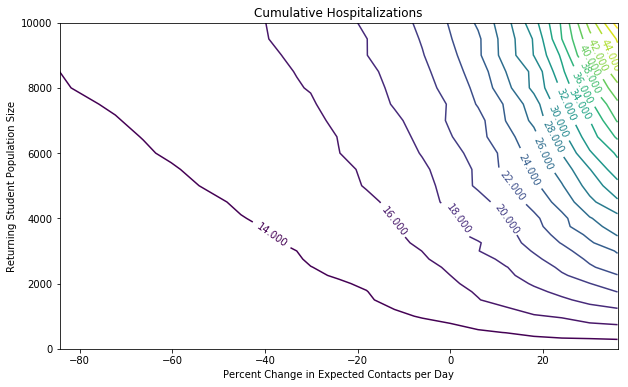

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations")
plt.ylabel("Returning Student Population Size")
plt.xlabel("Percent Change in Expected Contacts per Day")
CS = plt.contour(np.array([(x - 8.3) / 8.3 * 100 for x in X_contacts]),np.array(Y_popsize), np.array(Zs_hosp).T, 20)
plt.clabel(CS, inline=1, fontsize=10)

<a list of 15 text.Text objects>

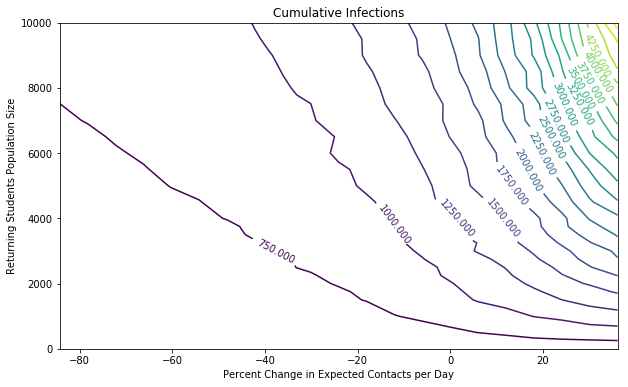

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Cumulative Infections")
plt.ylabel("Returning Students Population Size")
plt.xlabel("Percent Change in Expected Contacts per Day")
CS = plt.contour(np.array([(x - 8.3) / 8.3 * 100 for x in X_contacts]),np.array(Y_popsize), np.array(Zs_inf).T, 20)
plt.clabel(CS, inline=1, fontsize=10)

In [ ]:
/nfs01/covid_sims//1592252178-multiparam

In [68]:
sensitivity_output2 = MultiParamOutputLoader("/nfs01/covid_sims//1592252178-multiparam")